# Лекция №4

## Simple Thresholding
Здесь все просто. Если значение пикселя больше порогового значения, ему присваивается одно значение (может быть белым), в противном случае ему присваивается другое значение (может быть черным). Используемая функция **cv2.threshold(src, thresh, maxval, type)**

* **src** $-$ исходное изображение, которое должно быть изображением в градациях серого
* **thresh** $-$ пороговое значение, которое используется для классификации значений пикселей
* **maxval** $-$ представляет значение, которое будет дано, если значение пикселя больше (иногда меньше) порогового значения
* **type** $-$ предоставляет различные стили порогового значения.

Различные типы:
1. cv2.THRESH_BINARY
2. cv2.THRESH_BINARY_INV
3. cv2.THRESH_TRUNC
4. cv2.THRESH_TOZERO
5. cv2.THRESH_TOZERO_INV

На выходе функция возвращает два значения. Первый $-$ **retval**, которое будет объяснено позже. Второй $-$ **thresholded image**.

Подробнее в [документации](https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57).

Рассмотрим разные типы threshold на примере градиента серого цвета.

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

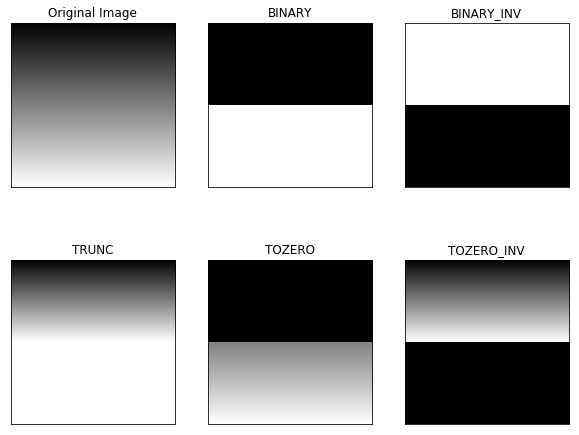

In [2]:
img = cv2.imread('img/grad_grayscale.png',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(10,8))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Thresholding
В предыдущем разделе мы использовали глобальное значение в качестве порогового значения. Но это может быть не хорошо во всех условиях, когда изображение имеет разные условия освещения в разных областях. В этом случае мы идем на адаптивный порог. При этом алгоритм вычисляет порог для небольших областей изображения. Таким образом, мы получаем разные пороговые значения для разных областей одного и того же изображения, и это дает нам лучшие результаты для изображений с разной освещенностью.

Он имеет три «специальных» входных параметра и только один выходной аргумент.

Адаптивный метод $-$ **cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)** - решает, как рассчитывается пороговое значение.

* **thresholdType**:
    * *cv2.ADAPTIVE_THRESH_MEAN_C*: пороговое значение является средним значением области соседства.

    * *cv2.ADAPTIVE_THRESH_GAUSSIAN_C*: пороговое значение представляет собой взвешенную сумму значений окрестностей, где веса представляют собой гауссово окно.

* **blockSize** $-$ определяет размер окрестности.

* **C** $-$ это просто константа, которая вычитается из вычисленного среднего или взвешенного среднего.

Ниже приведен фрагмент кода, сравнивающий глобальные пороги и адаптивные пороги для изображения с различным освещением:

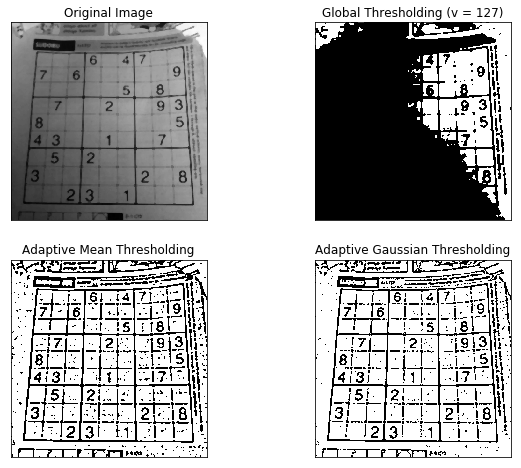

In [3]:
img = cv2.imread('img/sudoku.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Бинаризация Оцу
В первом разделе я говорил вам, что есть второй параметр retVal. Его использование происходит, когда мы идем на бинаризацию Оцу. Так что же это?

В глобальном пороговом значении мы использовали произвольное значение для порогового значения, верно? Итак, как мы можем знать, что выбранное нами значение является хорошим или нет? Ответ, метод проб и ошибок. Но рассмотрим бимодальное изображение (проще говоря, бимодальное изображение - это изображение, гистограмма которого имеет два пика). Для этого изображения мы можем приблизительно принять значение в середине этих пиков в качестве порогового значения, верно? Это то, что делает бинаризация Оцу. Таким образом, простыми словами, он автоматически вычисляет пороговое значение из гистограммы изображения для бимодального изображения. (Для изображений, которые не являются бимодальными, бинаризация не будет точной.)

Для этого используется наша функция **cv2.threshold()**, но передается дополнительный флаг *cv2.THRESH_OTSU*. Для порогового значения просто введите ноль. Затем алгоритм находит оптимальное пороговое значение и возвращает вас в качестве второго выхода retVal. Если пороговое значение Otsu не используется, **retVal** соответствует пороговому значению, которое вы использовали.

Проверьте ниже пример. Входное изображение является шумным изображением. В первом случае я применил глобальный порог для значения $127$. Во втором случае я применил порог Оцу напрямую. В третьем случае я отфильтровал изображение с гауссовым ядром $5\times5$, чтобы удалить шум, затем применил пороговое значение Оцу. Посмотрите, как фильтрация шума улучшает результат.

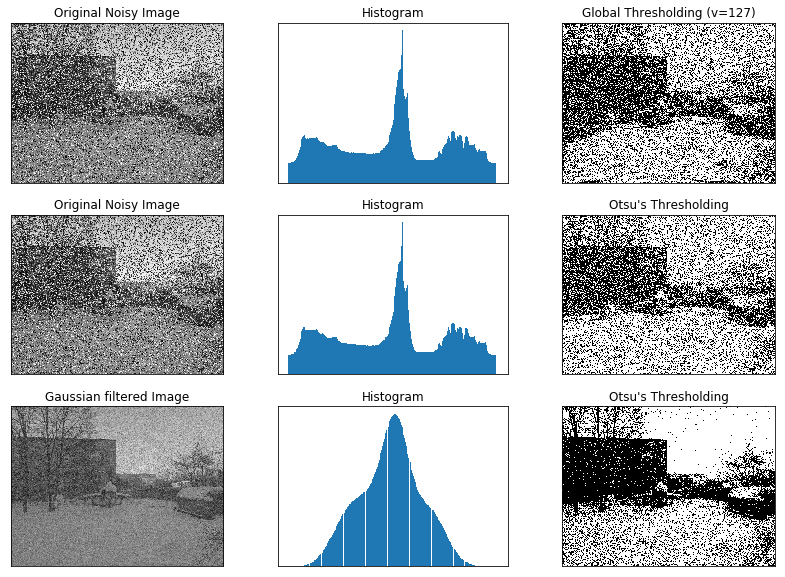

In [4]:
img = cv2.imread('img/laba.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.random.rand(*noise_img.shape)*np.max(noise_img)
noise_img[mask] = r[mask]

img = noise_img


# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(14,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Производная

На прошлом лекции, мы рассмотрели операцию свёртки и отметили, что свёртка — это очень полезная и распространённая операция, лежащая в основе различных фильтров. 

Одна из важнейших свёрток $-$ это вычисление производных. 
В математике и физике производные играют очень важную роль, то же самое можно сказать и про компьютерное зрение.
Но что же это за производная от изображения? Как мы помним, изображения, с которыми мы работаем, состоят из пикселей, которые, для картинки в градациях серого, задают значение яркости.
Т.е. наша картинка $-$ это просто двумерная матрица чисел. Теперь вспомним, что же такое производная.
***
**Производная (функции в точке)** $-$ это скорость изменения функции (в данной точке). Определяется как предел отношения приращения функции к приращению ее аргумента при стремлении приращения аргумента к нулю.
***

Получается, что, в нашем случае, производная — это отношение значения приращения пикселя по y к значению приращению пикселя по x: $dI = \frac{dy}{dx}$

Работая с изображением I, мы работает с функцией двух переменных $I(x,y)$, т.е. со скалярным полем. Поэтому, более правильно говорить не о производной, а о градиенте изображения.
***
**Градиент (от лат. gradiens — шагающий, растущий)** $-$ вектор, показывающий направление наискорейшего возрастания некоторой величины, значение которой меняется от одной точки пространства к другой (скалярного поля).
***

Если каждой точке M области многомерного пространства поставлено в соответствие некоторое (обычно $-$ действительное) число $u$, то говорят, что в этой области задано скалярное поле.


Итак, градиент для каждой точки изображения (функция яркости) — двумерный вектор, компонентами которого являются производные яркости изображения по горизонтали и вертикали $-$ $grad[I(x,y)] = (\frac{dI}{dx}, \frac{dI}{dy})$

В каждой точке изображения градиентный вектор ориентирован в направлении наибольшего увеличения яркости, а его длина соответствует величине изменения яркости.

вектор (в заданной точке) задаётся двумя значениями: длиной и направлением.

* длинной: $\sqrt{dx^2 + dy^2}$;

* направление $-$ угол между вектором и осью $x$: $\tan^{-1}(\frac{dy}{dx})$;


Для дифференцирования изображения используется, так называемый, оператор **Собеля**.

**Оператор Собеля** $-$ это дискретный дифференциальный оператор, вычисляющий приближение градиента яркости изображения.
Оператор вычисляет градиент яркости изображения в каждой точке. Так находится направление наибольшего увеличения яркости и величина её изменения в этом направлении. Результат показывает, насколько «резко» или «плавно» меняется яркость изображения в каждой точке, а значит, вероятность нахождения точки на грани, а также ориентацию границы.

Т.о. результатом работы оператора Собеля в точке области постоянной яркости будет нулевой вектор, а в точке, лежащей на границе областей различной яркости — вектор, пересекающий границу в направлении увеличения яркости.

Наиболее часто оператор Собеля применяется в алгоритмах выделения границ. 

Оператор Собеля основан на свёртке изображения небольшими целочисленными фильтрами в вертикальном и горизонтальном направлениях, поэтому его относительно легко вычислять. Оператор использует ядра 3x3, с которыми свёртывают исходное изображение для вычисления приближенных значений производных по горизонтали и по вертикали.


### Формализация
Пусть ${\displaystyle \mathbf {A} }$ $-$ это исходное изображение, а ${\displaystyle \mathbf {G} _{x}}$ и ${\displaystyle \mathbf {G} _{y}}$ $-$ два изображения, на которых каждая точка содержит приближённые производные по ${\displaystyle x}$ и по ${\displaystyle y}$. Они вычисляются следующим образом:

${\displaystyle \mathbf {G} _{y}={\begin{bmatrix}-1&-2&-1\\0&0&0\\+1&+2&+1\\\end{bmatrix}}*\mathbf {A} \quad {\mbox{and}}\quad \mathbf {G} _{x}={\begin{bmatrix}-1&0&+1\\-2&0&+2\\-1&0&+1\end{bmatrix}}*\mathbf {A} }$

# Контур и как его найти

**Контурный анализ** $-$ это один из важных и очень полезных методов описания, хранения, распознавания, сравнения и поиска графических образов/объектов. 

**Контур** $-$ это внешние очертания (обвод) предмета/объекта.

При проведении контурного анализа:
* полагается, что контур содержит достаточную информацию о форме объекта;
* внутренние точки объекта во внимание не принимаются. 

Вышеприведённые положения, разумеется, накладывают существенные ограничения на область применения контурного анализа, которые, в основном, связаны с проблемами выделения контура на изображениях:
* из-за одинаковой яркости с фоном объект может не иметь чёткой границы, или может быть зашумлён помехами, что приводит к невозможности выделения контура;
* перекрытие объектов или их группировка приводит к тому, что контур выделяется неправильно и не соответствует границе объекта.

Однако, переход к рассмотрению только контуров объектов позволяет уйти от пространства изображения – к пространству контуров, что существенно снижает сложность алгоритмов и вычислений. 

Т.о., контурный анализ имеет довольно слабую устойчивость к помехам, и любое пересечение или лишь частичная видимость объекта приводит либо к невозможности детектирования, либо к ложным срабатываниям, но простота и быстродействие контурного анализа, позволяют вполне успешно применять данный подход (при чётко выраженном объекте на контрастном фоне и отсутствии помех).

Итак, мы определились, что контур — это некая граница объекта, которая отделяет его от фона (других объектов). 

Во всех случаях мы получаем бинарное изображение, которое явным образом задаёт нам границы объекта. Вот эта совокупность пикселей, составляющих границу объекта и есть контур объекта.

Чтобы оперировать полученным контуром, его необходимо как-то представить (закодировать). 
Например, указывать вершины отрезков, составляющих контур.
Другой известный способ кодирования контура $-$ это **цепной код Фримена**. Этот метод будет рассмотрен чуть позже.

## Оператор Лапласа
Он вычисляет лапласиан изображения, заданного соотношением,
${\Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}}$
где каждая производная находится с использованием производных Собеля. Если ksize = $1$, то для фильтрации используется следующее ядро:

$$
{\begin{equation*}
\ K = \begin{pmatrix}
0 & \ 1 & \ 0 \\ 
1 & \ -4 & \ 1 \\ 
0 & \ 1 & \ 0 
\end{pmatrix}
\end{equation*}}$$

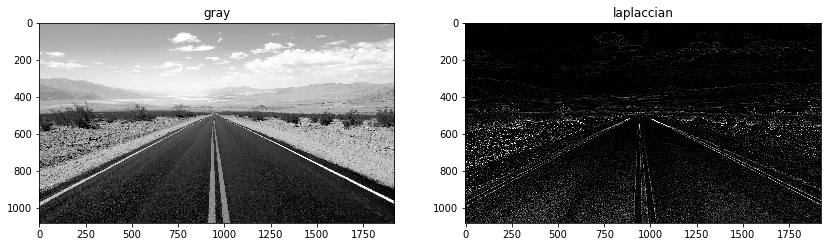

In [5]:
img = cv2.imread('img/road_2.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

## выделяем границы
laplac = cv2.Laplacian(gray_img, cv2.THRESH_BINARY, scale=0.25, ksize=5)
laplac = cv2.medianBlur(laplac, 5)

fig, m_axs = plt.subplots(1,2, figsize=(14,12))
ax1, ax2 = m_axs

ax1.set_title('gray')
ax1.imshow(gray_img, cmap='gray')
ax2.set_title('laplaccian')
ax2.imshow(laplac, cmap='gray');

## Детектор границ Кенни (Canny)

### Теория
**Canny Edge Detection** $-$ популярный алгоритм обнаружения краев. Это многоступенчатый алгоритм, и мы пройдем через все этапы.

1. **Шумоподавление**

Поскольку обнаружение краев подвержено воздействию шума на изображении, первым шагом является удаление шума на изображении с помощью фильтра Гаусса $5\times5$. Мы уже видели это в предыдущих главах.

2. **Поиск градиента интенсивности изображения**

Затем сглаженное изображение фильтруется ядром Собеля (рассмотрен выше) в горизонтальном и вертикальном направлении, чтобы получить первую производную в горизонтальном направлении ($G_x$) и вертикальном направлении ($G_y$). Из этих двух изображений мы можем найти градиент края и направление для каждого пикселя следующим образом:

$${Edge(G) = \sqrt{ G_x^2 + G_y^2}}$$
$${Angle(\theta) = \tan^{-1}(\frac{G_x}{G_y})}$$

Направление градиента всегда перпендикулярно краям. Он округлен до одного из четырех углов, представляющих вертикальное, горизонтальное и два диагональных направления.

3. **Немаксимальное подавление**

После получения величины и направления градиента выполняется полное сканирование изображения для удаления любых нежелательных пикселей, которые могут не составлять края. Для этого в каждом пикселе пиксель проверяется, является ли он локальным максимумом в его окрестности в направлении градиента. Проверьте изображение ниже:

<img src="img/nms.jpg" alt="Drawing" style="width: 500px;"/> 

Точка $А$ находится на краю (в вертикальном направлении). Направление градиента нормальное к краю. Точки $B$ и $C$ находятся в градиентных направлениях. Таким образом, точка $A$ проверяется с помощью точек $B$ и $C$, чтобы увидеть, образует ли она локальный максимум. Если это так, он рассматривается для следующего этапа, в противном случае он подавляется (обнуляется).

Короче говоря, в результате вы получите бинарное изображение с «тонкими краями».

4. **Гистерезис пороговый**

Эта стадия решает, какие ребра действительно являются ребрами, а какие нет. Для этого нам понадобятся два пороговых значения, **minVal** и **maxVal**. Любые ребра с градиентом интенсивности, превышающим **maxVal**, обязательно будут ребрами, а ребра ниже **minVal** не будут ребрами, поэтому отбрасываются. Те, кто лежит между этими двумя порогами, классифицируются как ребра или не ребра в зависимости от их связности. Если они связаны с точными пикселями, они считаются частью ребер. В противном случае они также отбрасываются. Смотрите изображение ниже:

<img src="img/hysteresis.jpg" alt="Drawing" style="width: 500px;"/> 

Край $A$ выше **maxVal**, так что считается «верным краем». Хотя ребро $C$ меньше **maxVal**, оно связано с ребром $A$, так что это также считается допустимым ребром, и мы получаем эту полную кривую. Но ребро $B$, хотя оно выше **minVal** и находится в той же области, что и ребро $C$, не связано с каким-либо «верным краем», поэтому отбрасывается. Поэтому очень важно, чтобы мы выбрали соответственно **minVal** и **maxVal**, чтобы получить правильный результат.

На этом этапе также удаляются небольшие пиксельные шумы в предположении, что края являются длинными линиями.

Итак, что мы в итоге получаем, это сильные края изображения.

## Детектор границ Кенни в OpenCV
OpenCV помещает все вышеперечисленное в одну функцию **cv2.Canny(image,threshold1,threshold2,apertureSize,L2gradient)**. 

* **image** $-$ это наше входное изображение
* **threshold1** $-$ minVal для процедуры гистерезиса
* **threshold2** $-$ maxVal для процедуры гистерезиса
* **apertureSize** $-$ размер ядра Собеля, используемый для поиска градиентов изображения, по умолчанию равен $3$
* **L2gradient** $-$ флаг, определяет уравнение для определения величины градиента. Если это True, он использует упомянутое выше уравнение, которое является более точным, в противном случае он использует эту функцию: Edge_Gradient($G$) = |$G_x$| + |$G_y$|. По умолчанию это False.

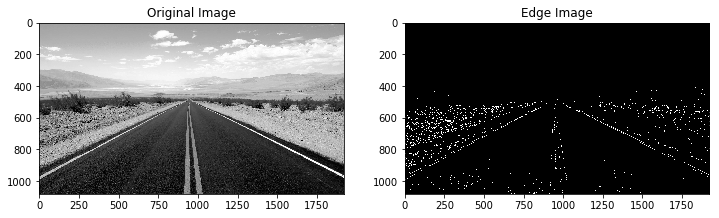

In [6]:
img = cv2.imread('img/road_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
edges = cv2.Canny(img,360,360,5)

fig, m_axs = plt.subplots(1, 2, figsize=(12, 5))
ax1, ax2 = m_axs

ax1.set_title('Original Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('Edge Image')
ax2.imshow(edges, cmap='gray');


__Контрольные вопросы:__

В чем минусы сразу брать границы у такого изображения?

Можно настроить параметы алгоритма так, чтобы выделить здание?

Что нужно исправить с картинкой?

Какое концептуальное различие в приминении размытия и морфологии к обработке картинки с контуром?
***
Почему это работает плохо тут?
Где будет работать хорошо? Зачем это нужно? (выделения полосы движения на дороге, локальные задачи поиска предметов)

Выделить цвет, который характерен для исследуемого объекта, затем применить поиск границ

# Самостоятельная работа

Ваша задача попробовать на практике методы, которые мы изучили на лекциях к любой картинке из примеров к данной работе. 

**Основная цель** $-$ вытащить из изображения его границы, для дальнейший работы.

*Ниже приведен пример кода:*

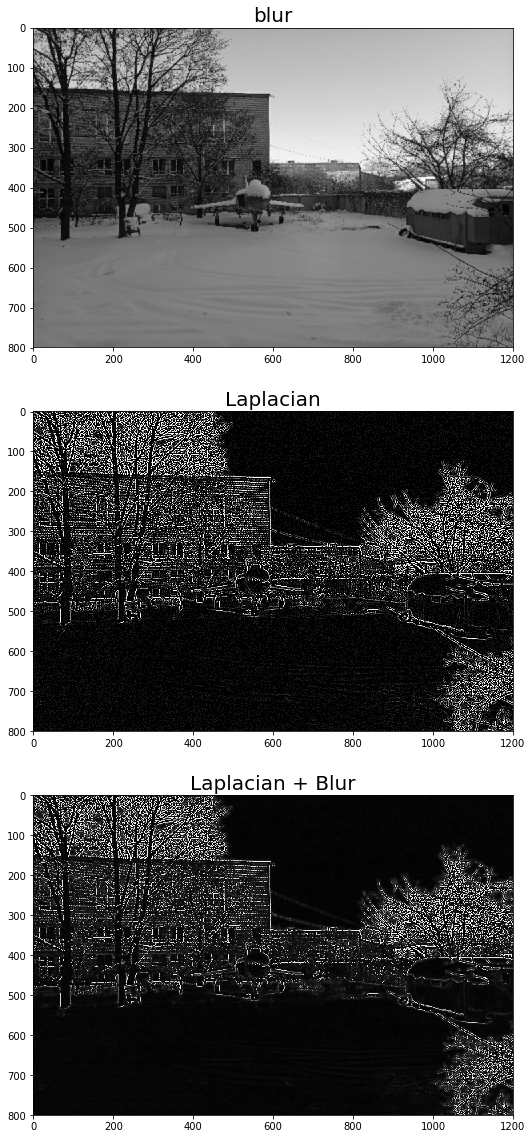

In [7]:
## сюда же морфологию еще прикрутить
     
img = cv2.imread('img/laba.jpg')
img = cv2.resize(img.copy(), (600, 400))
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
## Лапласиан 
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)/0.1

## переведем изображение в оттенки серого - цвет нам тут не нужен
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)


## Попробуем несколько типов блюра 
blur = cv2.blur(gray, (3,3))                       ## осреднение значений в ядре 
gaus_blur = cv2.GaussianBlur(gray, (5,5), 0)       ## гауссов блюр 
median_blur = cv2.medianBlur(gray, 5)              ## медиана всех значений в ядре 
bil_blur = cv2.bilateralFilter(gray, 9, 75, 75)    ## двусторонниый фильтр 
pyr_d = cv2.pyrDown(gray)                          ## blur & downsampling
pyr_u = cv2.pyrUp(gray)                            ## blur & upsampling 
#pyr_mean = cv2.pyrMeanShiftFiltering(img, 25, 40)  ## выделяет области по цвету (аналог knn в машинке)

#gray_pyr_mean = cv2.cvtColor(pyr_mean, cv2.COLOR_RGB2GRAY)

## Применяем фильтры 
dst = cv2.filter2D(pyr_u, -1, kernel)           ## находим границы лапласианом
#dst_blur = cv2.GaussianBlur(dst, (5,5),0)
kernel = np.ones((5,5),np.uint8)
dst_blur = cv2.bilateralFilter(dst,9,75,75)                  ## еще раз блюрим для гладких границ 

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

plt.gray()
ax1.set_title('blur', fontsize=20)
ax1.imshow(pyr_u)
ax2.set_title('Laplacian', fontsize=20)
ax2.imshow(dst)
ax3.set_title('Laplacian + Blur', fontsize=20)
ax3.imshow(dst_blur);

*Еще пример кода:*

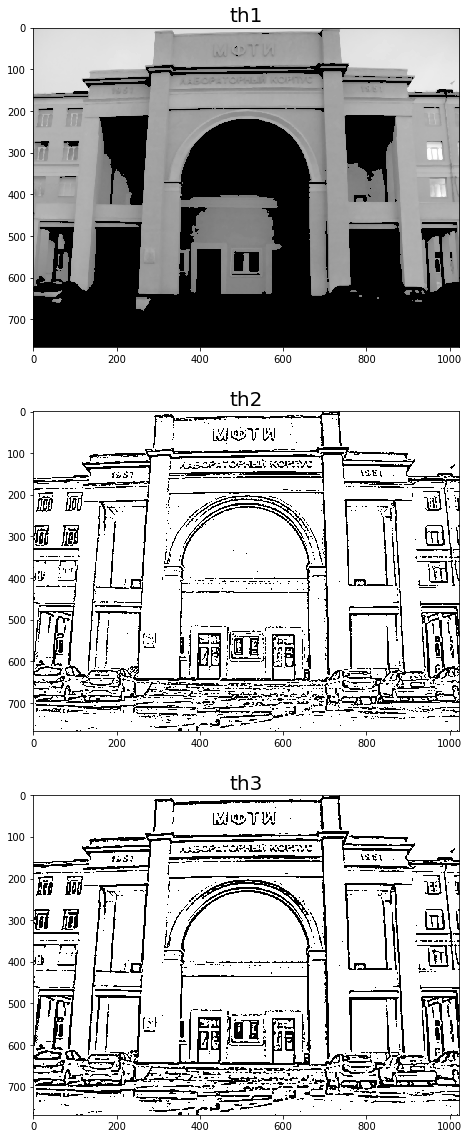

In [8]:
img = cv2.imread('img/lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.medianBlur(img, 5)
#img = cv2.pyrMeanShiftFiltering(img, 25, 40)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th1 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)[1]
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

plt.gray()
ax1.set_title('th1', fontsize=20)
ax1.imshow(th1)
ax2.set_title('th2', fontsize=20)
ax2.imshow(th2)
ax3.set_title('th3', fontsize=20)
ax3.imshow(th3);

## Преобразования Хафа

### Теория
**Hough Transform** $-$ популярный метод обнаружения любой формы, если вы можете представить эту форму в математической форме. Он может обнаружить форму, даже если он немного сломан или искажен. Посмотрим, как это работает для линии.

Линия может быть представлена как ${y = mx + c}$ или в параметрической форме, как ${\rho=x\cos(\theta)+y\sin(\theta)}$, где ${\rho}$ $-$ перпендикулярное расстояние от начала координат до линии, а $\theta$ $-$ угол, образованный этой перпендикулярной линией и горизонтальной осью, измеренный в счетчике по часовой стрелке (это направление зависит от того, как вы представляете систему координат. Это представление используется в OpenCV). Проверьте изображение ниже:

IMG

Таким образом, если линия проходит ниже начала координат, она будет иметь положительное значение $\rho$ и $\theta <180$. Если она идет выше начала координат, вместо того, чтобы брать угол больше $180$, угол выбирается меньше $180$, а значение ${\rho}$ принимается отрицательным. Любая вертикальная линия будет иметь $0$ градусов, а горизонтальные линии будут иметь $90$ градусов.

Теперь посмотрим, как работает Hough Transform для линий. Любая линия может быть представлена в этих двух терминах ${(\rho, \theta)}$. Поэтому сначала он создает двумерный массив или аккумулятор (для хранения значений двух параметров), и для него изначально устанавливается значение ${\theta}$. Пусть строки обозначают ${\rho}$, а столбцы $-$ ${\theta}$. Размер массива зависит от точности, которая вам нужна. Предположим, вы хотите, чтобы точность углов составляла 1 градус, вам нужно $180$ столбцов. Для ${\rho}$ максимально возможное расстояние $-$ это диагональная длина изображения. Таким образом, с точностью до одного пикселя, количество строк может быть диагональной длины изображения.

Рассмотрим изображение размером $100\times100$ с горизонтальной линией посередине. Возьмите первую точку линии. Вы знаете его $(x,y)$ значения. Теперь в линейном уравнении поместите значения ${\theta = 0,1,2, \dots, 180}$ и проверьте полученное значение ${\rho}$. Для каждой ${(\rho, \theta)}$ пары вы увеличиваете значение на единицу в нашем аккумуляторе в соответствующих ${(\rho, \theta)}$ ячейках. Так что теперь в аккумуляторе ячейка $(50,90) = 1$ вместе с некоторыми другими ячейками.

Теперь возьмите вторую точку на линии. Сделайте так же, как указано выше. Увеличьте значения в ячейках, соответствующих ${(\rho, \theta)}$, которые вы получили. На этот раз ячейка $(50,90) = 2$. На самом деле вы голосуете за значения ${(\rho, \theta)}$. Вы продолжаете этот процесс для каждой точки на линии. В каждой точке ячейка $(50,90)$ будет увеличена или оценена, в то время как другие ячейки могут или не могут быть проголосованы. Таким образом, в конце ячейка $(50,90)$ получит максимальное количество голосов. Поэтому, если вы будете искать в аккумуляторе максимальное количество голосов, вы получите значение $(50,90)$, которое говорит, что на этом изображении есть линия на расстоянии $50$ от начала координат и под углом $90$ градусов. Это хорошо показано на анимации ниже:

<img src="img/houghlinesdemo.gif" alt="Drawing" style="width: 500px;"/>


 ***
 Более подробное описание алгоритма по [ссылке]( http://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm)

## Преобразование Хафа в OpenCV
Все объясненное выше инкапсулировано в функцию OpenCV, **cv2.HoughLines(image,rho,theta,threshold,args*)**. Он просто возвращает массив значений ${(\rho, \theta)}$. ${\rho}$ измеряется в пикселях, а ${\theta}$ измеряется в радианах.

* **image** $-$ «входное изображение», должен быть двоичным изображением, поэтому примените пороговое значение или используйте обнаружение контуров, прежде чем находить применение грубого преобразования
* **rho** $-$ разрешение по расстоянию аккумулятора в пикселях
* **theta** $-$ угловое разрешение аккумулятора в радианах.
* **threshold** $-$ это порог, который означает минимальное количество голосов, которое он должен получить, чтобы его считали линией. Помните, что количество голосов зависит от количества точек на линии. Таким образом, он представляет минимальную длину линии, которая должна быть обнаружена.

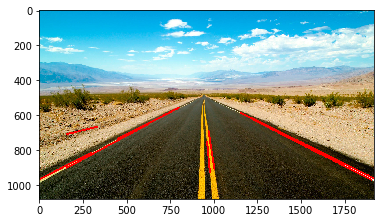

In [9]:
img = cv2.imread('img/road_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 350, 450, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=150, maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),10)
    
plt.imshow(img);

## Вероятностное преобразование Хафа
В грубом преобразовании вы можете видеть, что даже для строки с двумя аргументами требуется много вычислений. Вероятностное преобразование Хафа - это оптимизация преобразования Хафа, которое мы видели. Он не учитывает все точки, а только случайное подмножество точек, и этого достаточно для обнаружения линии. Просто мы должны уменьшить порог. Смотрите изображение ниже, которое сравнивает Hough Transform и Вероятностное Hough Transform в пространстве Hough.

Реализация в OpenCV  **cv2.HoughLinesP(image,rho,theta,threshold,minLineLength,maxLineGap)**. У него есть два новых аргумента.

* **minLineLength** $-$ минимальная длина линии. Сегменты линии короче этого отклоняются.
* **maxLineGap** $-$ максимально допустимый разрыв между отрезками, чтобы рассматривать их как одну линию.

Лучше всего то, что он напрямую возвращает две конечные точки линий. В предыдущем случае вы получили только параметры линий, и вам нужно было найти все точки. Здесь все прямое и простое.

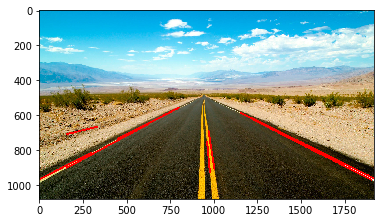

In [10]:
img = cv2.imread('img/road_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 350, 450, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=150, maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),10)
    
plt.imshow(img);

## Домашняя работа №3

В продолжении темы предыдущей задачи. Допустим, нам удалось понять, что на рассматриваемом изображении находится море. Значит, есть шанс на то, что можно найти корабли на картинке. 

Ваша задача - написать программу, которая посчитает площадь одного или нескольких кораблей на входном изображении. Площадь найти в пикселях. В приложении можно найти реальные спутниковые снимки кораблей. Подобные примеры изображений присутствуют в тесте.

<table><tr>
    <td> <img src="../src/bin_ship/task_img/test_image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="../src/bin_ship/task_img/test_image_06.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="../src/bin_ship/task_img/test_image_08.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>